Bibliotecas 

In [1]:
import pandas as pd
import numpy as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import style

In [17]:
style.use('bmh')

Coletando os dados 

In [4]:
def preco_fechamento(ticker, inicio, fim):
    dados = yf.download(ticker + '.SA', start=inicio, end=fim)['Adj Close']
    return dados

Buscando a empresa 

In [52]:
tots = preco_fechamento('TOTS3', '2020-01-01', '2021-10-30')
tots.tail()

[*********************100%***********************]  1 of 1 completed


Date
2021-10-25    33.380001
2021-10-26    33.400002
2021-10-27    33.200001
2021-10-28    32.910000
2021-10-29    32.759998
Name: Adj Close, dtype: float64

Gráfico: cotação

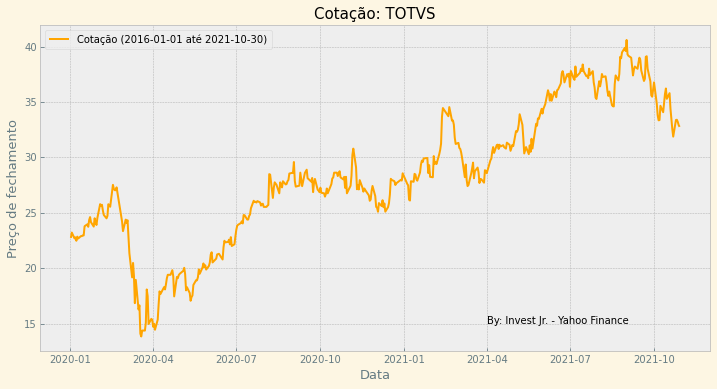

In [63]:
plt.figure(figsize=(12, 6));
x, = plt.plot(tots, color='orange');
plt.title('Cotação: TOTVS', fontsize=15);
plt.xlabel('Data', fontsize=13);
plt.ylabel('Preço de fechamento', fontsize=13);
plt.text(pd.Datetime64('2021-04-01'), 15, 'By: Invest Jr. - Yahoo Finance', fontsize=10);
plt.legend([x], ['Cotação (2016-01-01 até 2021-10-30)'], fontsize=10);


Calculando retorno simples

In [54]:
def retorno(variavel):
    retorno = variavel.pct_change()
    retorno.dropna(inplace=True)
    return retorno

In [55]:
tots_retorno = retorno(tots)
tots_retorno.head()

Date
2020-01-03    0.021258
2020-01-06   -0.022798
2020-01-07    0.004202
2020-01-08   -0.013420
2020-01-09    0.016528
Name: Adj Close, dtype: float64

Calculando retorno acumulado

In [56]:
def retorno_acumulado(variavel):
    retorno_acumulado = (1 + variavel).cumprod()
    return retorno_acumulado

In [57]:
tots_retacum = retorno_acumulado(tots_retorno)
tots_retacum.tail()


Date
2021-10-25    1.468175
2021-10-26    1.469055
2021-10-27    1.460258
2021-10-28    1.447503
2021-10-29    1.440905
Name: Adj Close, dtype: float64

In [58]:
tots_retacum[-1]

1.4409053580867919

Gráfico: retorno simples

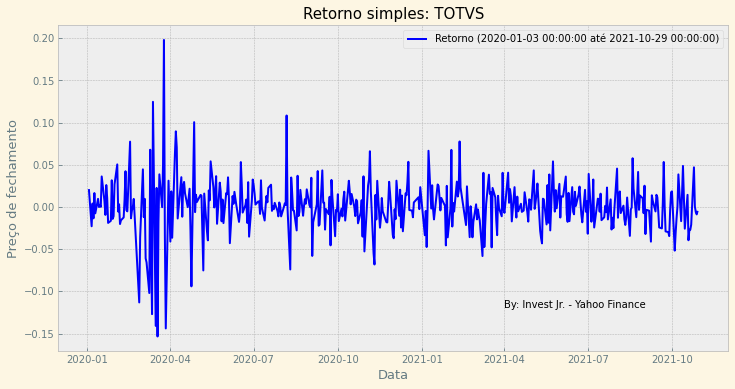

In [64]:
plt.figure(figsize=(12, 6));
x, = plt.plot(tots_retorno, color='blue');
plt.title('Retorno simples: TOTVS', fontsize=15);
plt.xlabel('Data', fontsize=13);
plt.ylabel('Preço de fechamento', fontsize=13);
plt.text(pd.Datetime64('2021-04-01'), -0.12, 'By: Invest Jr. - Yahoo Finance', fontsize=10);
plt.legend([x], [f'Retorno ({tots_retorno.index[0]} até {tots_retorno.index[-1]})'], fontsize=10);

Gráfico: retorno acumulado

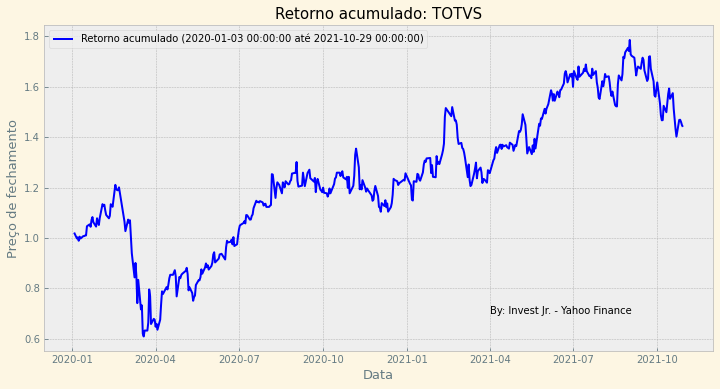

In [65]:
plt.figure(figsize=(12, 6));
x, = plt.plot(tots_retacum, color='blue');
plt.title('Retorno acumulado: TOTVS', fontsize=15);
plt.xlabel('Data', fontsize=13);
plt.ylabel('Preço de fechamento', fontsize=13);
plt.text(pd.Datetime64('2021-04-01'), 0.7, 'By: Invest Jr. - Yahoo Finance', fontsize=10);
plt.legend([x], [f'Retorno acumulado ({tots_retacum.index[0]} até {tots_retacum.index[-1]})'], fontsize=10);